In [1]:
import astropy
from astropy.io import fits
import numpy
from numpy import *
import matplotlib as mpl
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import yt
from scipy.signal import find_peaks

%matplotlib inline

/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def weighted_avg_and_std(values, weights, good):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    values = values[good]
    weights = weights[good]
    
    values = values[~isnan(values)]
    weights = weights[~isnan(values)]

    average = np.average(values, weights=weights)
    # Fast and numerically precise:
    variance = np.average((values-average)**2, weights=weights)
    return (average, math.sqrt(variance))



In [3]:
m1 = fits.open('/Users/rsimons/Dropbox/rcs_foggie/outputs/nref11n_nref10f_DD0906_momentum.fits')
m2 = fits.open('/Users/rsimons/Dropbox/rcs_foggie/outputs/nref11n_nref10f_DD0907_momentum.fits')
m3 = fits.open('/Users/rsimons/Dropbox/rcs_foggie/outputs/nref11n_nref10f_DD0956_momentum.fits')


ds1 = yt.load('/Users/rsimons/Dropbox/rcs_foggie/data/halo_008508/DD0906/DD0906')
ds2 = yt.load('/Users/rsimons/Dropbox/rcs_foggie/data/halo_008508/DD0907/DD0907')
ds3 = yt.load('/Users/rsimons/Dropbox/rcs_foggie/data/halo_008508/DD0956/DD0956')

dss = [ds1, ds2, ds3]



yt : [INFO     ] 2019-01-15 13:37:46,251 Parameters: current_time              = 295.316463725
yt : [INFO     ] 2019-01-15 13:37:46,253 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-01-15 13:37:46,255 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-01-15 13:37:46,256 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-01-15 13:37:46,258 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-01-15 13:37:46,259 Parameters: current_redshift          = 0.900132268192
yt : [INFO     ] 2019-01-15 13:37:46,261 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2019-01-15 13:37:46,262 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2019-01-15 13:37:46,264 Parameters: hubble_constant           = 0.695
yt : [INFO     ] 2019-01-15 13:37:46,290 Parameters: current_time              = 295.566463923
yt : [INFO     ] 2019-01-15 13:37:46,292 Parameters: domain_dimensions         = [256 256 2

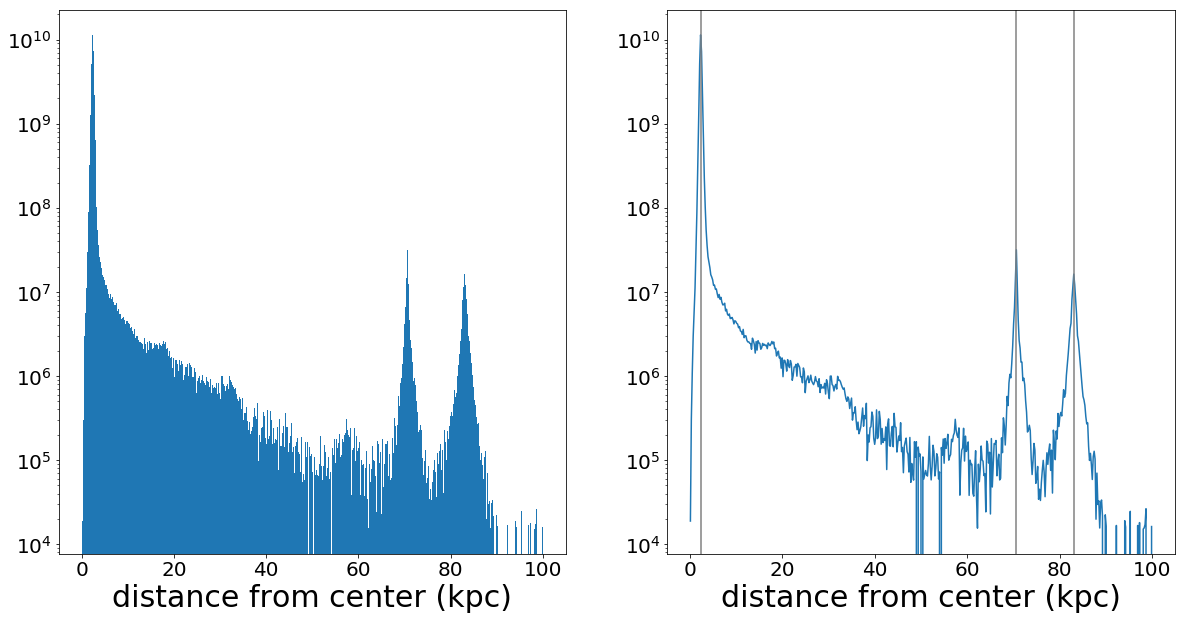

In [4]:
fig, axes = plt.subplots(1,2, figsize = (20,10))


xmn, xmx = 0, 100
jmn, jmx = -8, 8

bns = 500

ms_s = m1['STAR_MASS'].data
age_s = m1['STAR_AGE'].data

id_s = m1['STARS_ID'].data
rd_s = sqrt(sum(m1['STARS_GAL_POSITION'].data**2., axis = 0))
x_s, y_s, z_s = m1['STARS_GAL_POSITION'].data
vx_s, vy_s, vz_s = m1['STARS_GAL_VELOCITY'].data

x_s_box, y_s_box, z_s_box = m1['STARS_BOX_POSITION'].data
vx_s_box, vy_s_box, vz_s_box = m1['STARS_BOX_VELOCITY'].data


hst, edges = histogram(rd_s, weights = ms_s, bins = linspace(0, xmx, bns))

rds = np.mean([edges[0:len(edges) - 1], edges[1:len(edges)]], axis = 0)


axes[0].hist(rd_s, weights = ms_s, bins = linspace(0, xmx, bns))
axes[1].plot(rds, hst)




peaks, _ = find_peaks(hst, distance = 1.*bns/(xmx-xmn), threshold = 1.e6/(0.2*bns/(xmx-xmn)))


for p in peaks:
    axes[1].axvline(rds[p], color = 'grey')

for ax in axes:
    ax.set_yscale('log')
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xlabel('distance from center (kpc)', fontsize = 30)

    

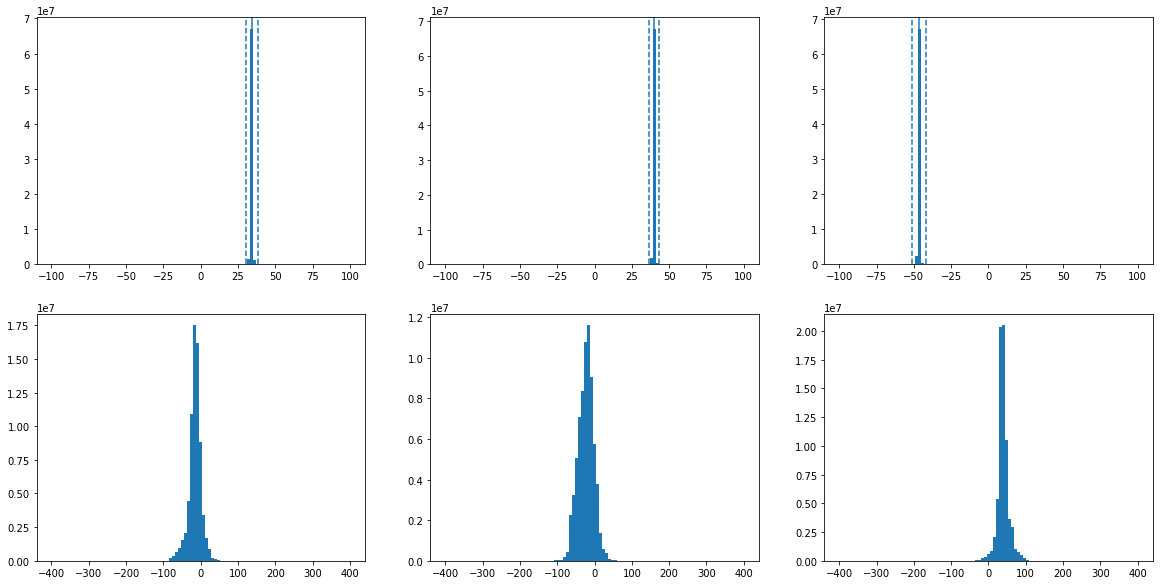

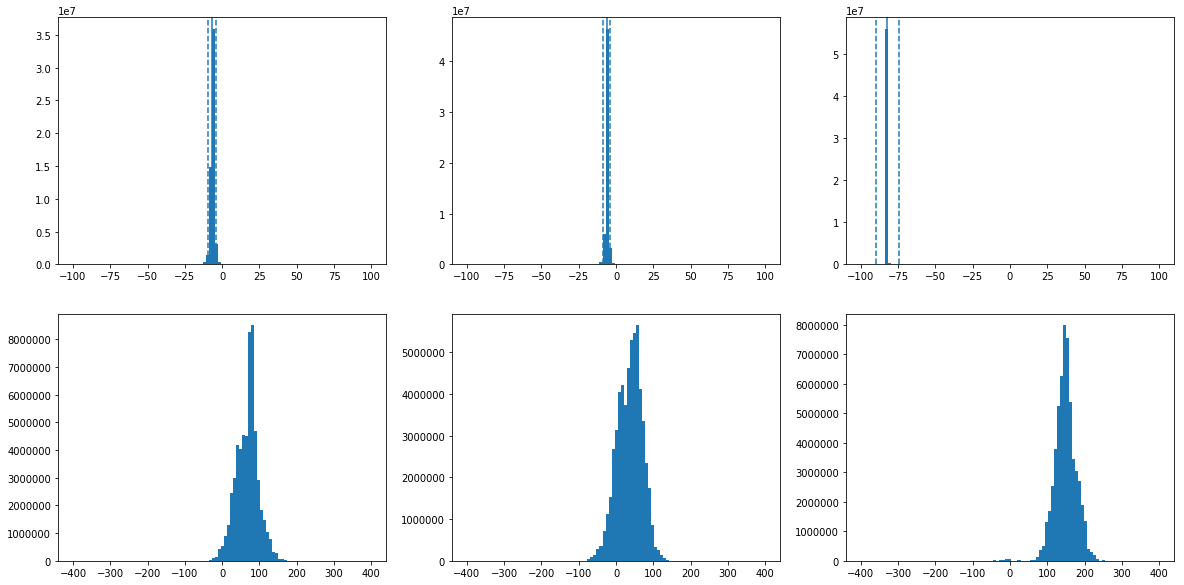

In [7]:
peaks_use = peaks[1:len(peaks)]

bns_2d = 1000

rds = np.mean([edges[0:len(edges) - 1], edges[1:len(edges)]], axis = 0)

for i,p in enumerate(peaks_use):
    fig, axes = plt.subplots(2,3, figsize = (20, 10))

    mn_r = rds[p] - 0.5
    mx_r = rds[p] + 0.5

    in_sel = (rd_s > mn_r) & (rd_s < mx_r)
    in_sel_age = (rd_s > mn_r) & (rd_s < mx_r) & (age_s > 2.e9)
    x_s_avg, x_s_std = weighted_avg_and_std(x_s, weights = ms_s, good = in_sel)
    y_s_avg, y_s_std = weighted_avg_and_std(y_s, weights = ms_s, good = in_sel)
    z_s_avg, z_s_std = weighted_avg_and_std(z_s, weights = ms_s, good = in_sel)



    x_hist = axes[0,0].hist(x_s[in_sel], weights = ms_s[in_sel], bins = linspace(-100, 100, 100))
    y_hist = axes[0,1].hist(y_s[in_sel], weights = ms_s[in_sel], bins = linspace(-100, 100, 100))
    z_hist = axes[0,2].hist(z_s[in_sel], weights = ms_s[in_sel], bins = linspace(-100, 100, 100))


    axes[0,0].axvline(x = x_s_avg)
    axes[0,0].axvline(x = x_s_avg + x_s_std, linestyle = 'dashed')
    axes[0,0].axvline(x = x_s_avg - x_s_std, linestyle = 'dashed')

    axes[0,1].axvline(x = y_s_avg)
    axes[0,1].axvline(x = y_s_avg + y_s_std, linestyle = 'dashed')
    axes[0,1].axvline(x = y_s_avg - y_s_std, linestyle = 'dashed')

    axes[0,2].axvline(x = z_s_avg)
    axes[0,2].axvline(x = z_s_avg + z_s_std, linestyle = 'dashed')
    axes[0,2].axvline(x = z_s_avg - z_s_std, linestyle = 'dashed')


    vx_hist = axes[1,0].hist(vx_s[in_sel], weights = ms_s[in_sel], bins = linspace(-400, 400, 100))
    vy_hist = axes[1,1].hist(vy_s[in_sel], weights = ms_s[in_sel], bins = linspace(-400, 400, 100))
    vz_hist = axes[1,2].hist(vz_s[in_sel], weights = ms_s[in_sel], bins = linspace(-400, 400, 100))

    good       = where((abs(x_s[in_sel] - x_s_avg) < 3 * x_s_std) & 
                       (abs(y_s[in_sel] - y_s_avg) < 3 * y_s_std) & 
                       (abs(z_s[in_sel] - z_s_avg) < 3 * z_s_std))[0]

    good_ids  = id_s[in_sel][good]
    good_ages = age_s[in_sel][good]
    good_rds = rd_s[in_sel][good]
    good_mss = ms_s[in_sel][good]
    good_xs = x_s[in_sel][good]
    good_ys = y_s[in_sel][good]
    good_zs = z_s[in_sel][good]
    good_vxs = vx_s[in_sel][good]
    good_vys = vy_s[in_sel][good]
    good_vzs = vz_s[in_sel][good]

    good_xs_box = x_s_box[in_sel][good]
    good_ys_box = y_s_box[in_sel][good]
    good_zs_box = z_s_box[in_sel][good]
    good_vxs_box = vx_s_box[in_sel][good]
    good_vys_box = vy_s_box[in_sel][good]
    good_vzs_box = vz_s_box[in_sel][good]






    anchor_ids  = good_ids[argsort(good_ages)[::-1][0:1000]].astype('int')
    anchor_ages = good_ages[argsort(good_ages)[::-1][0:1000]]
    anchor_rds  = good_rds[argsort(good_ages)[::-1][0:1000]]
    anchor_mss  = good_mss[argsort(good_ages)[::-1][0:1000]]

    anchor_xs    = good_xs[argsort(good_ages)[::-1][0:1000]]
    anchor_ys    = good_ys[argsort(good_ages)[::-1][0:1000]]
    anchor_zs    = good_zs[argsort(good_ages)[::-1][0:1000]]
    anchor_vxs  = good_vxs[argsort(good_ages)[::-1][0:1000]]
    anchor_vys  = good_vys[argsort(good_ages)[::-1][0:1000]]
    anchor_vzs  = good_vzs[argsort(good_ages)[::-1][0:1000]]



    anchor_xs_box    = good_xs_box[argsort(good_ages)[::-1][0:1000]]
    anchor_ys_box    = good_ys_box[argsort(good_ages)[::-1][0:1000]]
    anchor_zs_box    = good_zs_box[argsort(good_ages)[::-1][0:1000]]
    anchor_vxs_box  = good_vxs_box[argsort(good_ages)[::-1][0:1000]]
    anchor_vys_box  = good_vys_box[argsort(good_ages)[::-1][0:1000]]
    anchor_vzs_box  = good_vzs_box[argsort(good_ages)[::-1][0:1000]]







    anchor_xs_box_avg, _  = weighted_avg_and_std(anchor_xs_box, weights = anchor_mss, good = arange(len(anchor_mss)))
    anchor_ys_box_avg, _  = weighted_avg_and_std(anchor_ys_box, weights = anchor_mss, good = arange(len(anchor_mss)))
    anchor_zs_box_avg, _  = weighted_avg_and_std(anchor_zs_box, weights = anchor_mss, good = arange(len(anchor_mss)))
    anchor_vxs_box_avg, _ = weighted_avg_and_std(anchor_vxs_box, weights = anchor_mss, good = arange(len(anchor_mss)))
    anchor_vys_box_avg, _ = weighted_avg_and_std(anchor_vys_box, weights = anchor_mss, good = arange(len(anchor_mss)))
    anchor_vzs_box_avg, _ = weighted_avg_and_std(anchor_vzs_box, weights = anchor_mss, good = arange(len(anchor_mss)))

    np.save('/Users/rsimons/Dropbox/rcs_foggie/outputs/nref11n_orig_%i.npy'%i, anchor_ids)









In [8]:
print 'anchor_xs_box_avg' , anchor_xs_box_avg
print 'anchor_ys_box_avg' , anchor_ys_box_avg
print 'anchor_zs_box_avg' , anchor_zs_box_avg
print 'anchor_vxs_box_avg', anchor_vxs_box_avg
print 'anchor_vys_box_avg', anchor_vys_box_avg
print 'anchor_vzs_box_avg', anchor_vzs_box_avg



anchor_xs_box_avg 37271.22312162655
anchor_ys_box_avg 36496.10846818732
anchor_zs_box_avg 38155.187490596625
anchor_vxs_box_avg 27.675572484434177
anchor_vys_box_avg -113.10146132467561
anchor_vzs_box_avg 210.99903111022326


In [13]:
for sat_n in arange(2):
    anchor_ids = np.load('/Users/rsimons/Dropbox/rcs_foggie/outputs/nref11n_orig_%i.npy'%sat_n)
    for mm, m in enumerate([m1, m2, m3]):
        
        ms_s = m['STAR_MASS'].data
        age_s = m['STAR_AGE'].data

        id_s = m['STARS_ID'].data
        rd_s = sqrt(sum(m['STARS_GAL_POSITION'].data**2., axis = 0))
        x_s, y_s, z_s = m['STARS_GAL_POSITION'].data
        vx_s, vy_s, vz_s = m['STARS_GAL_VELOCITY'].data

        x_s_box, y_s_box, z_s_box = m['STARS_BOX_POSITION'].data
        vx_s_box, vy_s_box, vz_s_box = m['STARS_BOX_VELOCITY'].data
    
        gd_indices = array([0 for i in arange(len(anchor_ids))])
        for g in arange(len(anchor_ids)):
            gd_indices[g] = int(where(id_s == anchor_ids[g])[0])
 
        print len(anchor_ids)

        anchor_mss      = ms_s[gd_indices]
        anchor_xs       = x_s[gd_indices]
        anchor_ys       = y_s[gd_indices]
        anchor_zs       = z_s[gd_indices]
        anchor_vxs      = vx_s[gd_indices]
        anchor_vys      = vy_s[gd_indices]
        anchor_vzs      = vz_s[gd_indices]

        anchor_xs_box    =  x_s_box[gd_indices]
        anchor_ys_box    =  y_s_box[gd_indices]
        anchor_zs_box    =  z_s_box[gd_indices]
        anchor_vxs_box   = vx_s_box[gd_indices]
        anchor_vys_box   = vy_s_box[gd_indices]
        anchor_vzs_box   = vz_s_box[gd_indices]

        good = where((abs(anchor_xs - median(anchor_xs)) < 10) & 
                     (abs(anchor_ys - median(anchor_ys)) < 10) & 
                     (abs(anchor_zs - median(anchor_zs)) < 10))[0]

        
        
        anchor_xs_avg, _ = weighted_avg_and_std(anchor_xs,  weights = anchor_mss, good = good)
        anchor_ys_avg, _ = weighted_avg_and_std(anchor_ys,  weights = anchor_mss, good = good)
        anchor_zs_avg, _ = weighted_avg_and_std(anchor_zs,  weights = anchor_mss, good = good)
        anchor_vxs_avg, _= weighted_avg_and_std(anchor_vxs, weights = anchor_mss, good = good)
        anchor_vys_avg, _= weighted_avg_and_std(anchor_vys, weights = anchor_mss, good = good)
        anchor_vzs_avg, _= weighted_avg_and_std(anchor_vzs, weights = anchor_mss, good = good)
        anchor_xs_box_avg, _  = weighted_avg_and_std(anchor_xs_box,  weights = anchor_mss, good = good)
        anchor_ys_box_avg, _  = weighted_avg_and_std(anchor_ys_box,  weights = anchor_mss, good = good)
        anchor_zs_box_avg, _  = weighted_avg_and_std(anchor_zs_box,  weights = anchor_mss, good = good)
        anchor_vxs_box_avg, _ = weighted_avg_and_std(anchor_vxs_box, weights = anchor_mss, good = good)
        anchor_vys_box_avg, _ = weighted_avg_and_std(anchor_vys_box, weights = anchor_mss, good = good)
        anchor_vzs_box_avg, _ = weighted_avg_and_std(anchor_vzs_box, weights = anchor_mss, good = good)

        if False:
            fig, axes = plt.subplots(2,3, figsize = (20, 10))

            x_hist = axes[0,0].hist(anchor_xs, weights = anchor_mss, bins = linspace(-100, 100, 100))
            y_hist = axes[0,1].hist(anchor_ys, weights = anchor_mss,  bins = linspace(-100, 100, 100))
            z_hist = axes[0,2].hist(anchor_zs, weights = anchor_mss,  bins = linspace(-100, 100, 100))

            vx_hist = axes[1,0].hist(anchor_vxs, weights = anchor_mss, bins = linspace(-300, 300, 100))
            vy_hist = axes[1,1].hist(anchor_vys, weights = anchor_mss,  bins = linspace(-300, 300, 100))
            vz_hist = axes[1,2].hist(anchor_vzs, weights = anchor_mss,  bins = linspace(-300, 300, 100))


            axes[0,0].axvline(x = anchor_xs_avg)
            axes[0,1].axvline(x = anchor_ys_avg)
            axes[0,2].axvline(x = anchor_zs_avg)

            axes[1,0].axvline(x = anchor_vxs_avg)
            axes[1,1].axvline(x = anchor_vys_avg)
            axes[1,2].axvline(x = anchor_vzs_avg)


        print 'anchor_xs_avg', anchor_xs_avg
        print 'anchor_ys_avg', anchor_ys_avg
        print 'anchor_zs_avg', anchor_zs_avg
        print 'anchor_vxs_avg', anchor_vxs_box_avg
        print 'anchor_vys_avg', anchor_vys_box_avg
        print 'anchor_vzs_avg', anchor_vzs_box_avg


        
        ds = dss[mm]
        to_save = [anchor_xs_box_avg, anchor_ys_box_avg, anchor_zs_box_avg, anchor_vxs_box_avg, anchor_vys_box_avg, anchor_vzs_box_avg, anchor_xs_avg, anchor_ys_avg, anchor_zs_avg, anchor_vxs_avg, anchor_vys_avg, anchor_vzs_avg]

        print '/Users/rsimons/Dropbox/rcs_foggie/outputs/nref11n_orig_mm%i_sat%i.npy'%(mm, sat_n)
        np.save('/Users/rsimons/Dropbox/rcs_foggie/outputs/nref11n_orig_mm%i_sat%i.npy'%(mm, sat_n), to_save)

        
        
        
        cen = yt.YTArray([ds.quan(anchor_xs_box_avg, 'kpc'), 
                          ds.quan(anchor_ys_box_avg, 'kpc'), 
                          ds.quan(anchor_zs_box_avg, 'kpc')])

        
        
        if False:
            yt.ProjectionPlot(ds, 'x', 'density', center = cen, width = (20,'kpc')).save('sat_n%i_mm%i_20kpc.png'%(sat_n, mm))
            yt.ProjectionPlot(ds, 'x', 'density', center = cen, width = (150,'kpc')).save('sat_n%i_mm%i_150kpc.png'%(sat_n, mm))

            

1000
anchor_xs_avg 34.36616243559768
anchor_ys_avg 40.11801292393057
anchor_zs_avg -46.86817188139245
anchor_vxs_avg -58.726338095719974
anchor_vys_avg -169.0393759226893
anchor_vzs_avg 103.03224228515678
/Users/rsimons/Dropbox/rcs_foggie/outputs/nref11n_orig_mm0_sat0.npy
1000
anchor_xs_avg 34.208163824105114
anchor_ys_avg 39.934789902842176
anchor_zs_avg -46.62067698917712
anchor_vxs_avg -59.12798934256907
anchor_vys_avg -169.37424835029626
anchor_vzs_avg 102.66308278158013
/Users/rsimons/Dropbox/rcs_foggie/outputs/nref11n_orig_mm1_sat0.npy
1000
anchor_xs_avg 21.869582962651293
anchor_ys_avg 26.988732383547898
anchor_zs_avg -27.712310214919317
anchor_vxs_avg -113.19252221360168
anchor_vys_avg -224.97578517393086
anchor_vzs_avg 149.5137757615222
/Users/rsimons/Dropbox/rcs_foggie/outputs/nref11n_orig_mm2_sat0.npy
1000
anchor_xs_avg -6.867154483033565
anchor_ys_avg -6.241073691310556
anchor_zs_avg -82.5046173678289
anchor_vxs_avg 27.675572484434177
anchor_vys_avg -113.10146132467561
anch

yt : [INFO     ] 2019-01-15 13:05:00,212 Projection completed
yt : [INFO     ] 2019-01-15 13:05:00,214 xlim = 36532.468496 36552.468496
yt : [INFO     ] 2019-01-15 13:05:00,215 ylim = 38180.828124 38200.828124
yt : [INFO     ] 2019-01-15 13:05:00,218 xlim = 0.482445 0.482709
yt : [INFO     ] 2019-01-15 13:05:00,220 ylim = 0.504213 0.504477
yt : [INFO     ] 2019-01-15 13:05:00,222 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



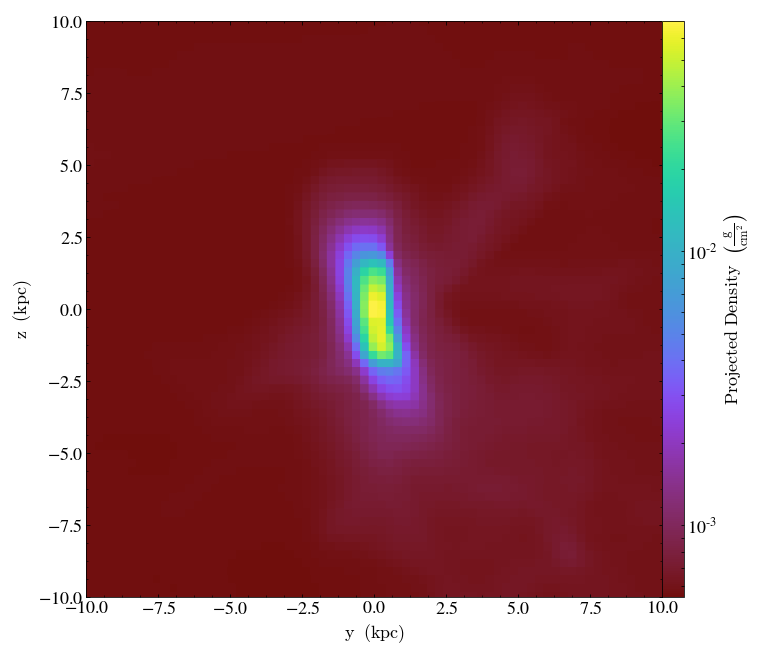

In [24]:
yt.ProjectionPlot(dss[mm], 'x', 'density', center=cen, width = (20,'kpc'))

In [ ]:
this is some code

In [25]:
cen

YTArray([37312.46240299, 36542.4684956 , 38190.82812434]) kpc